# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()
%matplotlib inline


Bad key savefig.frameon in file C:\Users\alexg\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\alexg\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\alexg\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get 

In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")
len(api_key)

32

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    sort_by="relevancy"
)
#bitcoin

In [5]:
# Fetch the Ethereum news articles
ethereum = newsapi.get_everything(
    q="Ethereum",
    language="en",
    sort_by="relevancy"
)
#ethereum

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        
        bitcoin_sentiments.append({
            "compound": compound,
            "negative": neg,
            "neutral": neu,
            "positive": pos,
            "text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
#cols = ["date", "text", "compound", "positive", "negative", "neutral"]
#bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()


compound  negative  neutral  positive  \
0   -0.2924     0.059    0.941     0.000   
1    0.3612     0.080    0.749     0.171   
2   -0.5574     0.096    0.904     0.000   
3   -0.3818     0.176    0.689     0.135   
4    0.5719     0.000    0.868     0.132   

                                                text  
0  The government of India is considering an 18% ...  
1  Just weeks after it shattered its yearslong as...  
2  When Mt. Gox went bankrupt in 2014, it was the...  
3  Ban reflects Twitters failure to promote healt...  
4  New York (CNN Business)Bitcoin has been flirti...

In [7]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        
        ethereum_sentiments.append({
            "compound": compound,
            "negative": neg,
            "neutral": neu,
            "positive": pos,
            "text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

ethereum_df.head()

compound  negative  neutral  positive  \
0    0.3412      0.00    0.926     0.074   
1    0.5256      0.00    0.901     0.099   
2   -0.2732      0.06    0.940     0.000   
3    0.0000      0.00    1.000     0.000   
4    0.0000      0.00    1.000     0.000   

                                                text  
0  Cryptocurrencies stole headlines on the first ...  
1  Ethereum creator Vitalik Buterin.\r\n14 with 1...  
2  Bitcoin fizzled in Monday trading as the famou...  
3  By Reuters Staff\r\nFILE PHOTO: A representati...  
4  By Reuters Staff\r\nFILE PHOTO: A representati...

In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

compound   negative    neutral   positive
count  18.000000  18.000000  18.000000  18.000000
mean    0.246172   0.039944   0.850944   0.109222
std     0.437049   0.055116   0.112382   0.099140
min    -0.557400   0.000000   0.647000   0.000000
25%     0.000000   0.000000   0.770750   0.000000
50%     0.244600   0.000000   0.859000   0.133500
75%     0.611650   0.067250   0.931750   0.155500
max     0.921700   0.176000   1.000000   0.353000

In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

compound   negative    neutral   positive
count  19.000000  19.000000  19.000000  19.000000
mean    0.104663   0.006684   0.961895   0.031421
std     0.285513   0.020056   0.055859   0.056226
min    -0.381800   0.000000   0.845000   0.000000
25%     0.000000   0.000000   0.929500   0.000000
50%     0.000000   0.000000   1.000000   0.000000
75%     0.170600   0.000000   1.000000   0.037000
max     0.636900   0.067000   1.000000   0.155000

### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

In [ ]:
# Bitcoin had the  highest mean positive score at .109 compared to Ethereum at .031.

# Bitcoin also had the highest max compound score of .922 compared to Ethereum's max
#compound score of .637.

# Finally, Bitcoin also had the highest positive score at .353 compared to .155 for 
#Ethereum.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
lemmatizer = WordNetLemmatizer()

In [12]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return tokens


In [40]:
# Create a new tokens column for bitcoin
bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df

compound  negative  neutral  positive  \
0    -0.2924     0.059    0.941     0.000   
1     0.3612     0.080    0.749     0.171   
2    -0.5574     0.096    0.904     0.000   
3    -0.3818     0.176    0.689     0.135   
4     0.5719     0.000    0.868     0.132   
5     0.6249     0.000    0.850     0.150   
6     0.0000     0.051    0.899     0.051   
7     0.1280     0.145    0.675     0.181   
8     0.9217     0.000    0.647     0.353   
9     0.5719     0.000    0.896     0.104   
10   -0.1027     0.042    0.958     0.000   
11    0.6697     0.000    0.849     0.151   
12    0.4391     0.070    0.782     0.148   
13    0.0000     0.000    1.000     0.000   
14    0.0000     0.000    1.000     0.000   
15    0.6597     0.000    0.843     0.157   
16    0.8173     0.000    0.767     0.233   
17    0.0000     0.000    1.000     0.000   

                                                 text  \
0   The government of India is considering an 18% ...   
1   Just weeks after it shattered its yearslong as...   
2   When Mt. Gox went bankrupt in 2014, it was the...   
3   Ban reflects Twitters failure to promote healt...   
4   New York (CNN Business)Bitcoin has been flirti...   
5   Cryptocurrency exchange company Gemini is acqu...   
6   President Joe Bidens pick to be the new comptr...   
7   Coinbase has a problem. As interest in bitcoin...   
8   Cryptocurrencies, more so than most other thin...   
9   Last Sunday we reported Bitcoin's price had su...   
10  The Square CEO warns that the regulations coul...   
11  By Reuters Staff\r\nLONDON, Dec 30 (Reuters) -...   
12  By Reuters Staff\r\nLONDON, Jan 4 (Reuters) - ...   
13  Posted \r\nBitcoin traded at $33,365 in Asia o...   
14  Posted \r\nBitcoin traded at $33,365 in Asia o...   
15  (Adds context, updates prices)\r\nLONDON, Dec ...   
16  LONDON (Reuters) - Bitcoin on Wednesday hit a ...   
17  FILE PHOTO: Representations of virtual currenc...   

                                               tokens  
0   [government, india, considering, tax, bitcoin,...  
1   [week, shattered, yearslong, aspiration, reach...  
2   [mt, gox, went, bankrupt, wa, world, largest, ...  
3   [ban, reflects, twitters, failure, promote, he...  
4   [new, york, cnn, businessbitcoin, ha, flirting...  
5   [cryptocurrency, exchange, company, gemini, ac...  
6   [president, joe, bidens, pick, new, comptrolle...  
7   [coinbase, ha, problem, interest, bitcoin, ha,...  
8   [cryptocurrencies, thing, valuable, shared, ag...  
9   [last, sunday, reported, bitcoins, price, surg...  
10  [square, ceo, warns, regulation, could, lead, ...  
11  [reuters, stafflondon, dec, reuters, bitcoin, ...  
12  [reuters, stafflondon, jan, reuters, bitcoin, ...  
13  [posted, bitcoin, traded, asia, monday, soarin...  
14  [posted, bitcoin, traded, asia, monday, soarin...  
15  [adds, context, update, priceslondon, dec, reu...  
16  [london, reuters, bitcoin, wednesday, hit, rec...  
17  [file, photo, representations, virtual, curren...

In [41]:
# Create a new tokens column for ethereum
ethereum_df['tokens'] = ethereum_df['text'].apply(tokenizer)
ethereum_df

compound  negative  neutral  positive  \
0     0.3412     0.000    0.926     0.074   
1     0.5256     0.000    0.901     0.099   
2    -0.2732     0.060    0.940     0.000   
3     0.0000     0.000    1.000     0.000   
4     0.0000     0.000    1.000     0.000   
5     0.0000     0.000    1.000     0.000   
6     0.0000     0.000    1.000     0.000   
7    -0.3818     0.067    0.933     0.000   
8     0.0000     0.000    1.000     0.000   
9     0.0000     0.000    1.000     0.000   
10    0.6293     0.000    0.845     0.155   
11    0.0000     0.000    1.000     0.000   
12    0.5106     0.000    0.875     0.125   
13    0.0000     0.000    1.000     0.000   
14    0.6369     0.000    0.856     0.144   
15    0.0000     0.000    1.000     0.000   
16    0.0000     0.000    1.000     0.000   
17    0.0000     0.000    1.000     0.000   
18    0.0000     0.000    1.000     0.000   

                                                 text  \
0   Cryptocurrencies stole headlines on the first ...   
1   Ethereum creator Vitalik Buterin.\r\n14 with 1...   
2   Bitcoin fizzled in Monday trading as the famou...   
3   By Reuters Staff\r\nFILE PHOTO: A representati...   
4   By Reuters Staff\r\nFILE PHOTO: A representati...   
5   By Reuters Staff\r\nFILE PHOTO: A representati...   
6   By Reuters Staff\r\nFILE PHOTO: A representati...   
7   It seems only fitting to end 2020 on a depress...   
8   By Reuters Staff\r\nFILE PHOTO: Representation...   
9   January\r\n9, 2021\r\n7 min read\r\nOpinions e...   
10  LONDON (Reuters) - Bitcoin on Wednesday jumped...   
11  NEW YORK (Reuters) - Outsized bets on large U....   
12  1 with 1 posters participating\r\nThe world's ...   
13  By Reuters Staff\r\nFILE PHOTO: Representation...   
14  Source: StackCommerce\r\nWhen the price of Bit...   
15  By Reuters Staff\r\nFILE PHOTO: Representation...   
16  By Reuters Staff\r\nFILE PHOTO: Representation...   
17  By Reuters Staff\r\nFILE PHOTO: A representati...   
18  By Reuters Staff\r\nFILE PHOTO: Representation...   

                                               tokens  
0   [cryptocurrencies, stole, headline, first, sto...  
1   [ethereum, creator, vitalik, buterin, poster, ...  
2   [bitcoin, fizzled, monday, trading, famously, ...  
3   [reuters, stafffile, photo, representation, vi...  
4   [reuters, stafffile, photo, representation, vi...  
5   [reuters, stafffile, photo, representation, vi...  
6   [reuters, stafffile, photo, representation, vi...  
7   [seems, fitting, end, depressing, note, end, c...  
8   [reuters, stafffile, photo, representations, v...  
9   [january, min, readopinions, expressed, entrep...  
10  [london, reuters, bitcoin, wednesday, jumped, ...  
11  [new, york, reuters, outsized, bet, large, us,...  
12  [poster, participatingthe, world, cryptocurren...  
13  [reuters, stafffile, photo, representations, v...  
14  [source, stackcommercewhen, price, bitcoin, ma...  
15  [reuters, stafffile, photo, representations, v...  
16  [reuters, stafffile, photo, representations, v...  
17  [reuters, stafffile, photo, representation, vi...  
18  [reuters, stafffile, photo, representations, v...

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [42]:
from collections import Counter
from nltk import ngrams

In [54]:
# Generate the Bitcoin N-grams where N=2
btc_ngram = Counter(ngrams(tokenizer(bitcoin_df["text"].str.cat()), 2))
print(dict(btc_ngram))

{('government', 'india'): 1, ('india', 'considering'): 1, ('considering', 'tax'): 1, ('tax', 'bitcoin'): 1, ('bitcoin', 'transaction'): 1, ('transaction', 'according'): 1, ('according', 'new'): 1, ('new', 'report'): 1, ('report', 'times'): 1, ('times', 'india'): 1, ('india', 'clear'): 1, ('clear', 'whether'): 1, ('whether', 'proposed'): 1, ('proposed', 'good'): 1, ('good', 'service'): 1, ('service', 'tax'): 1, ('tax', 'gst'): 1, ('gst', 'would'): 1, ('would', 'charsjust'): 1, ('charsjust', 'week'): 1, ('week', 'shattered'): 1, ('shattered', 'yearslong'): 1, ('yearslong', 'aspiration'): 1, ('aspiration', 'reaching'): 1, ('reaching', 'value'): 1, ('value', 'bitcoin'): 1, ('bitcoin', 'saturday'): 1, ('saturday', 'cryptocurrency'): 1, ('cryptocurrency', 'passed'): 1, ('passed', 'value'): 1, ('value', 'according'): 1, ('according', 'coindesk'): 1, ('coindesk', 'dip'): 1, ('dip', 'charswhen'): 1, ('charswhen', 'mt'): 1, ('mt', 'gox'): 1, ('gox', 'went'): 1, ('went', 'bankrupt'): 1, ('bankrup

In [56]:
# Generate the Ethereum N-grams where N=2
eth_ngram = Counter(ngrams(tokenizer(ethereum_df["text"].str.cat()), 2))
print(dict(eth_ngram))

{('cryptocurrencies', 'stole'): 1, ('stole', 'headline'): 1, ('headline', 'first'): 1, ('first', 'stockmarket'): 1, ('stockmarket', 'trading'): 1, ('trading', 'day'): 1, ('day', 'bitcoin'): 1, ('bitcoin', 'ethereum'): 1, ('ethereum', 'selling'): 1, ('selling', 'steeply'): 1, ('steeply', 'blistering'): 1, ('blistering', 'runup'): 1, ('runup', 'weekendbut'): 1, ('weekendbut', 'investor'): 1, ('investor', 'need'): 1, ('need', 'worry'): 1, ('worry', 'charsethereum'): 1, ('charsethereum', 'creator'): 1, ('creator', 'vitalik'): 1, ('vitalik', 'buterin'): 1, ('buterin', 'poster'): 1, ('poster', 'participatingether'): 1, ('participatingether', 'native'): 1, ('native', 'currency'): 1, ('currency', 'ethereum'): 1, ('ethereum', 'network'): 1, ('network', 'second'): 1, ('second', 'valuable'): 1, ('valuable', 'cryptocurrency'): 1, ('cryptocurrency', 'ha'): 1, ('ha', 'soared'): 1, ('soared', 'fi'): 1, ('fi', 'charsbitcoin'): 1, ('charsbitcoin', 'fizzled'): 1, ('fizzled', 'monday'): 1, ('monday', 'tr

In [45]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)


In [57]:
# Get the top 10 words for Bitcoin
tokens = Counter(tokenizer(bitcoin_df["text"].str.cat()))
token_count(tokens, N=10)

[('bitcoin', 13),
 ('cryptocurrency', 7),
 ('reuters', 7),
 ('world', 5),
 ('currency', 5),
 ('year', 5),
 ('record', 5),
 ('new', 4),
 ('ha', 4),
 ('popular', 4)]

In [59]:
# Get the top 10 words for Ethereum
tokens = Counter(tokenizer(ethereum_df["text"].str.cat()))
token_count(tokens, N=10)

[('bitcoin', 16),
 ('reuters', 15),
 ('currency', 14),
 ('taken', 14),
 ('photo', 11),
 ('virtual', 11),
 ('charsby', 10),
 ('stafffile', 10),
 ('illustration', 10),
 ('reutersdado', 10)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

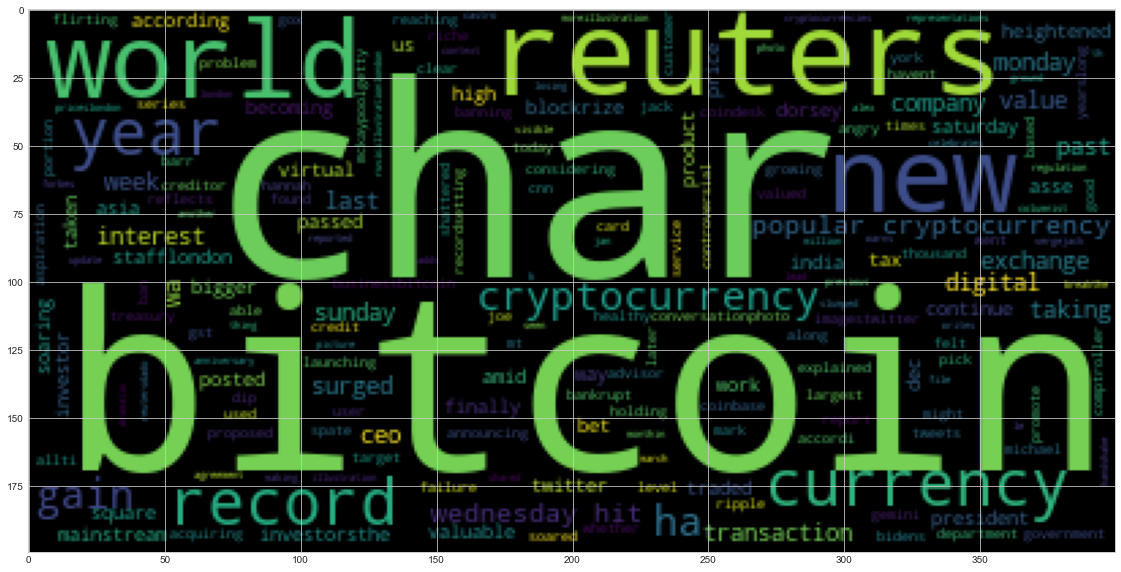

In [74]:
# Generate the Bitcoin word cloud
corpus = bitcoin_df["text"]

big_string = ' '.join(corpus)
input_text = tokenizer(big_string)
string = " ".join(input_text)
wc = WordCloud().generate(string)
plt.imshow(wc)

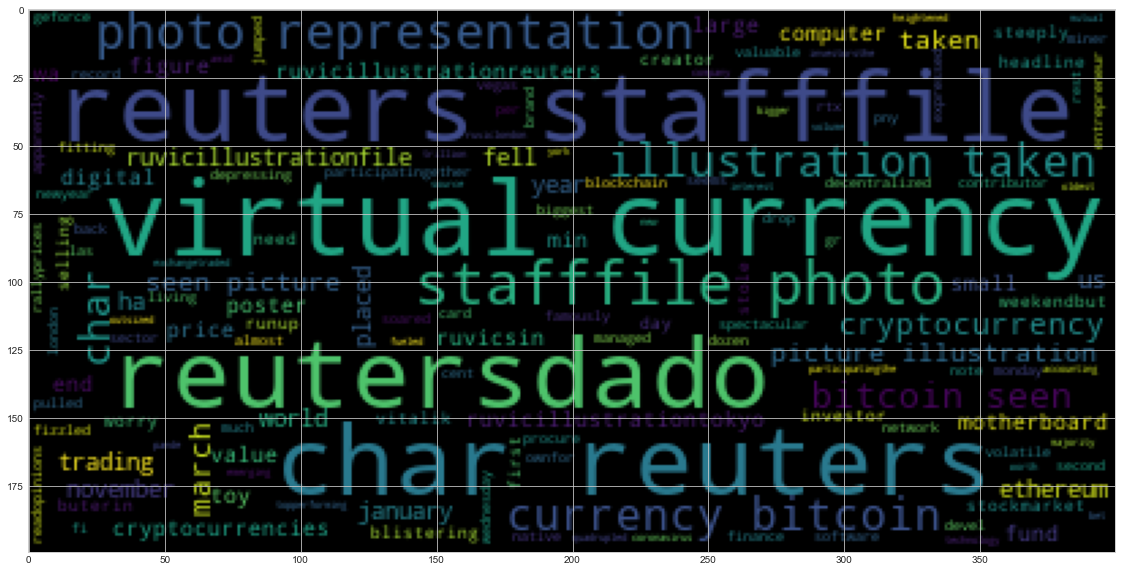

In [73]:
# Generate the Ethereum word cloud
corpus = ethereum_df["text"]

big_string = ' '.join(corpus)
input_text = tokenizer(big_string)
string = " ".join(input_text)
wc = WordCloud().generate(string)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [75]:
import spacy
from spacy import displacy

In [76]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [77]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [78]:
# Concatenate all of the bitcoin text together
btc_article = bitcoin_df["text"].str.cat()

In [79]:
# Run the NER processor on all of the text
doc = nlp(btc_article)

# Add a title to the document
# YOUR CODE HERE!

In [80]:
# Render the visualization
displacy.render(doc, style='ent')

In [81]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

['India', 'bitcoin', 'Bitcoin', 'Bitcoin', 'Tweets', 'US', 'Blockrizes', 'bitcoin', 'Bitcoin', 'Bitcoin', 'LONDON', 'Bitcoin', 'LONDON', 'Bitcoin', 'Bitcoin', 'Bitcoin', 'LONDON', 'Bitcoin', 'Bitcoin', 'Bitcoin', 'Bitcoin']


---

## Ethereum NER

In [82]:
# Concatenate all of the ethereum text together
eth_article = ethereum_df["text"].str.cat()

In [83]:
# Run the NER processor on all of the text
doc2 = nlp(eth_article)

# Add a title to the document
# YOUR CODE HERE!

In [84]:
# Render the visualization
displacy.render(doc2, style='ent')

In [85]:
# List all Entities
print([ent.text for ent in doc2.ents if ent.label_ == 'GPE'])

['bitcoin', 'Bitcoin', 'Bitcoin', 'Bitcoin', 'Bitcoin', 'Las Vegas', 'Bitcoin', 'Bitcoin', 'U.S.', 'U.S.', 'bitcoin', 'Bitcoin', 'LONDON', 'Bitcoin', 'Bitcoin', 'Bitcoin', 'U.S.', 'Bitcoin']
